<a href="https://colab.research.google.com/github/LagosJA/Mineria_de_Datos/blob/main/Visualizacion_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2 - Visualización de Datos

Equipo 1

Grupo 002 Miércoles 7-10 PM

Integrantes:


*   1851448 Muñoz Barrientos Regina
*   1941592 Lagos Martinez José Alejandro
*   1793775 Rodriguez Guerrero Luisa Victoria
*   1849202 Dominguez Victorino Cesar Oswaldo





## **BASE DE DATOS: Heart Disease UCI**

https://www.kaggle.com/ronitf/heart-disease-uci

### **Limpieza y Estadística**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Cambiamos el nombre de las columnas para entender de forma más clara.

In [2]:
df.columns = ['Edad','Sexo','DolorPecho','PresArtRep','Col','NivAzuAyu','Electro','MaxRitCard','Angina','MinElectro','Pendiente','NumVasSang','thal','Objetivo']
df.head()

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Buscamos si hay datos nulos en la base de datos.

In [3]:
df.isnull().sum()

Edad          0
Sexo          0
DolorPecho    0
PresArtRep    0
Col           0
NivAzuAyu     0
Electro       0
MaxRitCard    0
Angina        0
MinElectro    0
Pendiente     0
NumVasSang    0
thal          0
Objetivo      0
dtype: int64

**Informción Estadística Básica**

Procedemos a hacer la parte estadística.

In [4]:
df['thal'].describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

In [5]:
df['NumVasSang'].min()

0

In [6]:
df['NumVasSang'].max()

4

Según la descripción de los datos en Kaggle, la columna thal debe contener valores 1, 2 ó 3, por lo que el mínimo no debería ser cero.

De la misma forma para la columna NumVasSang, esta debe contener datos 0, 1, 2 ó 3, como el máximo es 4, significa que algo no está bien.

Se descubrieron algunas inconformidades entre los datos y la explicación ofrecida en la publicación, por lo que se investigó y se encontró que los datos fueron obtenidos de las bases de datos del hospital de Cleveland y comparando estas dos bases se descubrió que si existían datos nulos en la original y en la utilizada habían sido llenados con otros valores por lo que se decidió eliminar las filas que contenían estos datos nulos.

Esta información se consiguió en este foro de discusión: [https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877](https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877)

In [7]:
df=df.drop(df[df['NumVasSang'] == 4].index)
df=df.drop(df[df['thal'] == 0].index)
df=df.reset_index()
df=df.drop('index',axis=1)
df.shape

(296, 14)

In [8]:
df['NumVasSang'].max()

3

In [9]:
df['thal'].min()

1

Confirmamos que se eliminaron las filas que originalmente contenían datos nulos y que el mínimo y máximo de las columnas están dentro de los valores que pueden tomar las variables.

In [10]:
df['Sexo'].sum()

201

Como Sexo es una variable donde 1 significa que el paciente es hombre y el 0 que es mujer, la suma de esta columna es el total de hombres en la base de datos. Esta base cuenta con 201 pacientes del sexo masculino.

In [11]:
df['Edad'].mean()

54.523648648648646

In [12]:
df['Edad'].describe()

count    296.000000
mean      54.523649
std        9.059471
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: Edad, dtype: float64

La edad promedio de los pacientes es de 54.52 años. El paciente más joven en la base de datos tiene 29 años y el mayor 77.

In [13]:
df['Objetivo'].cumsum()

0        1
1        2
2        3
3        4
4        5
      ... 
291    160
292    160
293    160
294    160
295    160
Name: Objetivo, Length: 296, dtype: int64

En la columna 'Objetivo' tenemos 1 si el paciente fue diagnosticado con una enfermedad del corazón y 0 si no, aprovechando esto, utilizando la función de suma acumulada obtenemos la cantidad de personas que fueron diagnosticadas con enfermedad del corazón, en este caso 160.

In [14]:
df['Angina'].count()

296

Como la suma de los datos no nulos es igual al total de registros, esta columna no cuenta con datos nulos.

In [15]:
df['Col'].median()

242.5

In [16]:
df['Col'].var()

2701.609665597801

In [17]:
df['Col'].std()

51.9770109336599

Un nivel de colesterol saludable es entre 125 y 200 mg/dL, y como la mediana en la base de datos es 242.5, podemos decir que más de la mitad de los pacientes en el registro tienen colesterol alto.

El valor de la desviación estándar es alto, lo que indica que los datos están dispersos.

In [18]:
df['PresArtRep'].skew()

0.7107586909422692

Como el valor es positivo, podemos decir que los datos estan ligeramente sesgados a la izquierda.

In [19]:
df['MaxRitCard'].kurtosis()

-0.06067819411447051

Como la curtosis es cercana a 0, podemos inferir que su distribución de frecuencia se asemeja a una normal.

In [20]:
df.corr()

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
Edad,1.000000,-0.089820,-0.061405,0.288701,0.200920,0.133022,-0.112365,-0.395989,0.098051,0.199373,-0.161758,0.364229,0.063373,-0.225453
Sexo,-0.089820,1.000000,-0.048023,-0.059520,-0.193749,0.036981,-0.072303,-0.058293,0.140791,0.102641,-0.028719,0.088788,0.212017,-0.285322
DolorPecho,-0.061405,-0.048023,1.000000,0.044610,-0.067926,0.118337,0.039106,0.296621,-0.383902,-0.142159,0.104675,-0.226203,-0.162660,0.423425
PresArtRep,0.288701,-0.059520,0.044610,1.000000,0.126705,0.183658,-0.117539,-0.051817,0.070501,0.196793,-0.126742,0.102042,0.063773,-0.148922
Col,0.200920,-0.193749,-0.067926,0.126705,1.000000,0.014286,-0.142039,-0.001947,0.062132,0.042144,0.005572,0.119006,0.082496,-0.076541
NivAzuAyu,0.133022,0.036981,0.118337,0.183658,0.014286,1.000000,-0.082361,-0.007155,-0.001863,0.007062,-0.046550,0.151259,-0.017891,-0.004680
Electro,-0.112365,-0.072303,0.039106,-0.117539,-0.142039,-0.082361,1.000000,0.030001,-0.065623,-0.055528,0.090915,-0.111317,-0.008723,0.131716
MaxRitCard,-0.395989,-0.058293,0.296621,-0.051817,-0.001947,-0.007155,0.030001,1.000000,-0.383671,-0.346742,0.388453,-0.267861,-0.111961,0.426655
Angina,0.098051,0.140791,-0.383902,0.070501,0.062132,-0.001863,-0.065623,-0.383671,1.000000,0.287812,-0.248879,0.146783,0.224178,-0.425085
MinElectro,0.199373,0.102641,-0.142159,0.196793,0.042144,0.007062,-0.055528,-0.346742,0.287812,1.000000,-0.577779,0.292905,0.211675,-0.428804


Es interesante que la mayoría de los datos se correlacionan de forma negativa al diagnostico que nos interesa, es decir la columna objetivo.

In [21]:
df.cov()

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
Edad,82.074015,-0.380520,-0.575309,46.363617,94.609872,0.425366,-0.536154,-82.406528,0.417648,2.106902,-0.905989,3.100836,0.336292,-1.019606
Sexo,-0.380520,0.218678,-0.023225,-0.493392,-4.709276,0.006104,-0.017808,-0.626180,0.030955,0.055988,-0.008303,0.039017,0.058074,-0.066606
DolorPecho,-0.575309,-0.023225,1.069537,0.817820,-3.651306,0.043197,0.021301,7.046541,-0.186670,-0.171493,0.066926,-0.219835,-0.098534,0.218598
PresArtRep,46.363617,-0.493392,0.817820,314.233062,116.742991,1.149141,-1.097400,-21.099611,0.587597,4.069211,-1.388995,1.699828,0.662174,-1.317820
Col,94.609872,-4.709276,-3.651306,116.742991,2701.609666,0.262093,-3.888433,-2.324737,1.518392,2.555188,0.179043,5.812758,2.511612,-1.985983
NivAzuAyu,0.425366,0.006104,0.043197,1.149141,0.262093,0.124588,-0.015311,-0.058016,-0.000309,0.002908,-0.010158,0.050172,-0.003699,-0.000825
Electro,-0.536154,-0.017808,0.021301,-1.097400,-3.888433,-0.015311,0.277405,0.362964,-0.016251,-0.034115,0.029604,-0.055096,-0.002691,0.034631
MaxRitCard,-82.406528,-0.626180,7.046541,-21.099611,-2.324737,-0.058016,0.362964,527.657306,-4.143724,-9.290896,5.516560,-5.782112,-1.506436,4.892442
Angina,0.417648,0.030955,-0.186670,0.587597,1.518392,-0.000309,-0.016251,-4.143724,0.221060,0.157848,-0.072343,0.064853,0.061738,-0.099771
MinElectro,2.106902,0.055988,-0.171493,4.069211,2.555188,0.002908,-0.034115,-9.290896,0.157848,1.360662,-0.416669,0.321073,0.144628,-0.249693


A diferencia de la correlación, la covarianza no está limitada al intervalo (-1,1), por lo que a veces puede confundirnos. Por ejemplo, la cov(Edad,Col)>cov(Edad,PresArtRep), pero en la tabla anterior vemos que la edad está mejor correlacionada con la presión arterial en reposo que con el nivel de colesterol.

### **Gráficas Datos Univariantes**

**Gráficas de Barras**

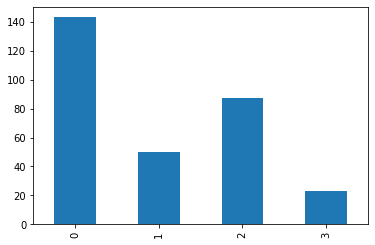

In [ ]:
df['DolorPecho'].value_counts().sort_index().plot.bar()

En esta variable las categorías son las siguientes: 

Valor 0: asintomático, Valor 1: angina típica, Valor 2: angina atípica, Valor 3: dolor no anginoso

Por lo que podemos concluir que la mayoría de los pacientes no presentaron un ningun tipo de dolor de pecho.

**Gráfico de Líneas**

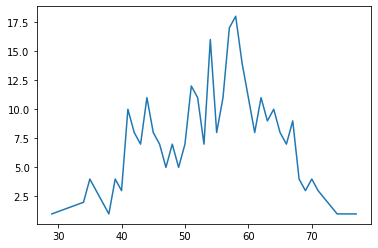

In [22]:
df['Edad'].value_counts().sort_index().plot.line()

Se presenta una mayor cantidad de registros para personas entre 50 y 60 años, hay muy pocos menores a 30 o mayores a 70 años.

**Histograma**

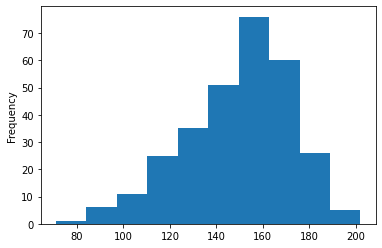

In [23]:
df['MaxRitCard'].plot.hist()

La mayoría de los máximos rítmos cardiácos registrados son mayores a 140 bmp (beats per minute), parecen tener una distribución sesgada a la derecha lo que indica que hay más valores altos que bajos.

### **Gráficas Bi-variantes**

**Gráficos de Dispersión**

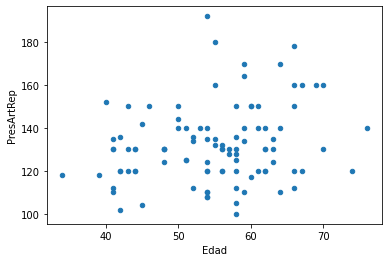

In [24]:
df.sample(100).plot.scatter(x='Edad', y='PresArtRep')

No podemos obtener mucha información del gráfico ya que los datos están algo esparcidos. Se puede observar que en general la presión arterial en reposo aumenta con la edad pero no es una tendencia muy clara.

**Hexplot**

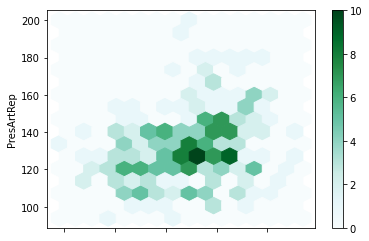

In [25]:
df.plot.hexbin(x='Edad', y='PresArtRep', gridsize=15)

En el hexplot, los héxagonos más oscuros representan las áreas donde se concentran más datos y a diferencia del scatterplot no corremos el riesgo de overplotting. Es más fácil apreciar la correlación positiva entre la edad y la presión arterial en reposo del paciente que habíamos mencionado en la sección anterior.

### **Stacked Plots**

**Gráfica de Barras Apilada**

In [40]:
h=df.loc[df['Sexo']==1,'NumVasSang'].value_counts()
m=df.loc[df['Sexo']==0,'NumVasSang'].value_counts()
n=[0,1,2,3]
bd = pd.DataFrame({"Numero Vasos Sanguineos":n, "Hombres":h, "Mujeres":m})
bd= bd.set_index("Numero Vasos Sanguineos")
bd

,Hombres,Mujeres
Numero Vasos Sanguineos,,
0,110,63
1,50,15
2,25,13
3,16,4


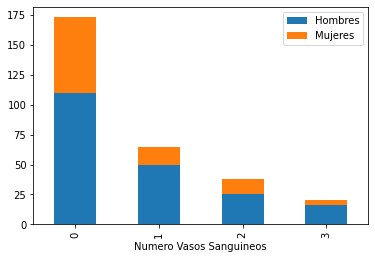

In [41]:
bd.plot.bar(stacked=True)

Podemos ver que conforme el número de vasos sanguíneos vistos en una fluorscopia aumenta, la frecuencia observada disminuye tanto para hombres como en mujeres.

**Gráfica de Área Apilada**

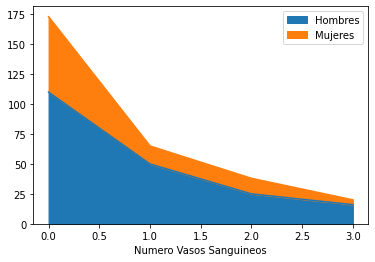

In [42]:
bd.plot.area()

Esta gráfica nos muestra la misma información que la anterior. La de área se puede preferir sobre la de barra si hay muchas categorías ya que la informacion se visualiza de manera continua. Si el número de vasos sanguíneos que se pueden ver en una fluorscopia es bajo esto puede indicar la presencia de coágulos o mala circulación, como vemos muchos pacientes caen en cero y esto podría significar mala salud del corazón.

**Gráfica de Líneas**

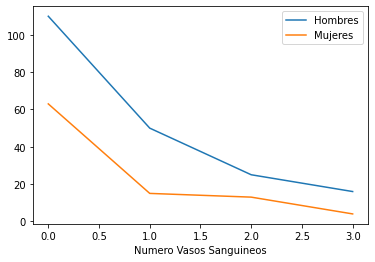

In [43]:
bd.plot.line()

En esta gráfica de líneas, los datos no estan apilados como en las dos anteriores, hay muy pocas mujeres con 3 vasos sanguíneos visibles. Para ambos sexos, la mayoría tienen cero vasos sanguíneos visibles.

### **Otras Librerías**

**Gráfico de Barras**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


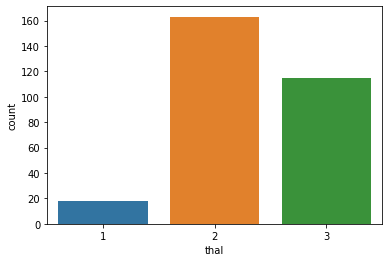

In [30]:
sns.countplot(df['thal'])

Esta columna indica el resultado a la prueba de esfuerzo con taliio, esta pureba muestra qué tan bien fluye la sangre hacia el músculo cardiaco. 1 es resultado normal, 2 en algún momento hubo un defecto que ya fue corregido y 3 que hay un defecto reversible. Observamos que menos de 20 de los 296 registros mostraron resultado normal. La mayoría tuvieron un defecto en algun momento y más de 100 muestran un defecto al momento de la evaluación.

**Kernel Density Estimation**

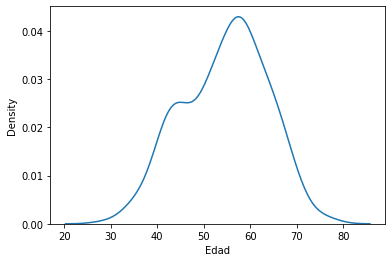

In [31]:
sns.kdeplot(df.Edad)

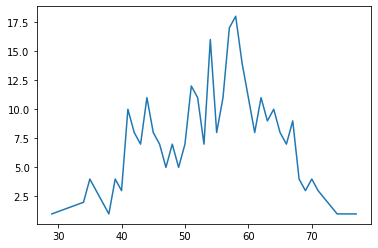

In [32]:
df['Edad'].value_counts().sort_index().plot.line()

Comparando el gráfico KDE con la gráfica de líneas que habíamos hecho anteriormente, observamos que esta nos ofrece una idea de como se distribuye la densidad de los datos pero de una forma más "suavizada". El máximo es alrededor de 60, lo que seignifica que es ahí donde se concentran más datos.

**KDE Bidimensional**

In [74]:
df['MinElectro'].describe()

count    296.000000
mean       1.059122
std        1.166474
min        0.000000
25%        0.000000
50%        0.800000
75%        1.650000
max        6.200000
Name: MinElectro, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


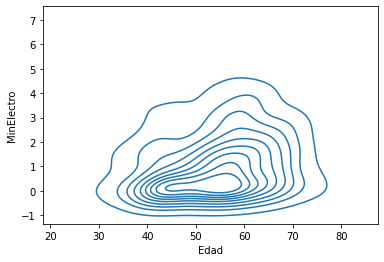

In [33]:
sns.kdeplot(df['Edad'],df['MinElectro'])

Puede que MinElectro no sea la mejor variable para hacer un KDE bidimensional ya que por la imagen pareciera que esta variable puede tomar valores menores a cero pero en realidad no lo hace. Para esta varaible el 50% de los registros está por debajo de 0.8  y es lo que causa que la gráfica se vea así.

**Histograma**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


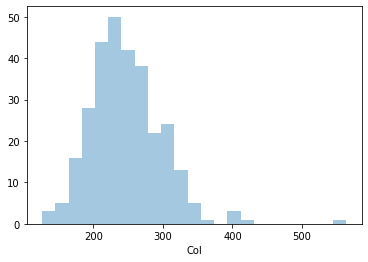

In [34]:
sns.distplot(df['Col'],  kde=False)

Por la forma del histograma podríamos estimar que la media y mediana son superiores a 200, lo que es un valor alto para el colesterol. Además parece que tenemos un dato atípico, más adelante un boxplot nos podrá ayudar a confirmarlo.

**Jointplot**

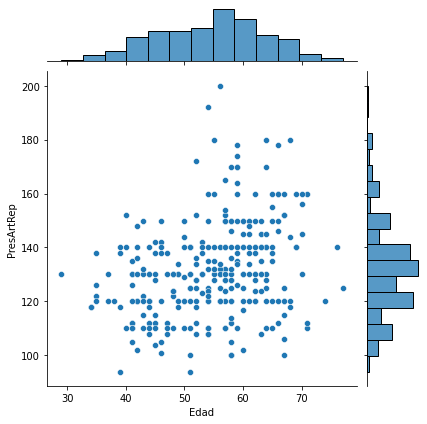

In [35]:
sns.jointplot(x='Edad', y='PresArtRep',data=df)

El jointplot nos permite ver los histogramas de las variables y el scatterplot entre ellas. De aquí podemos observar la correlación positiva entre Edad Y PresArtRep.

**Joint Hexplot**

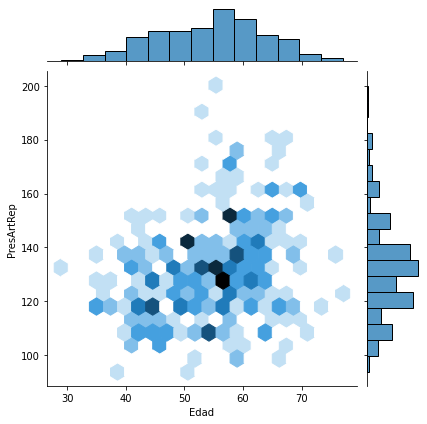

In [36]:
sns.jointplot(x='Edad', y='PresArtRep', data=df, kind='hex', gridsize=20)

Esta gráfica es similar a la anterior pero aquí podemos ver la concentración de los datos. De aquí observamos que hay una alta concentración de pacientes entre edades de 50 a 65 con presión arterial en reposo entre 120 y 145.

**Boxplot**

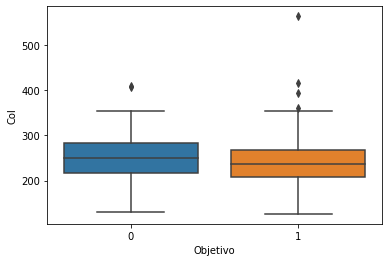

In [37]:
sns.boxplot(y='Col',x='Objetivo',data=df)

Esta gráfica nos hace inferir que el colesterol alto no afecta significativamente al diagnóstico del corazón del paciente ya que para ambos diagnósticos el primer cuartil está arriba de 200, que es un nivel alto de colesterol. En los pacientes que fueron diagnosticados con una enfermedad del corazón hay más datos atípicos.

**Gráfica de Violín**


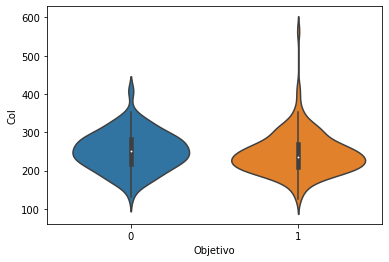

In [38]:
sns.violinplot(y='Col',x='Objetivo',data=df)

Nos ofrece información similar al boxplot, para ambos valores de la columna Objetivo hay varios datos concentrados en valores de colesterol mayores a 200. La delgada línea que se observa en el violín para aquellos registros con Objetivo=1 son los datos atípicos que vimos en la gráfica anterior. 

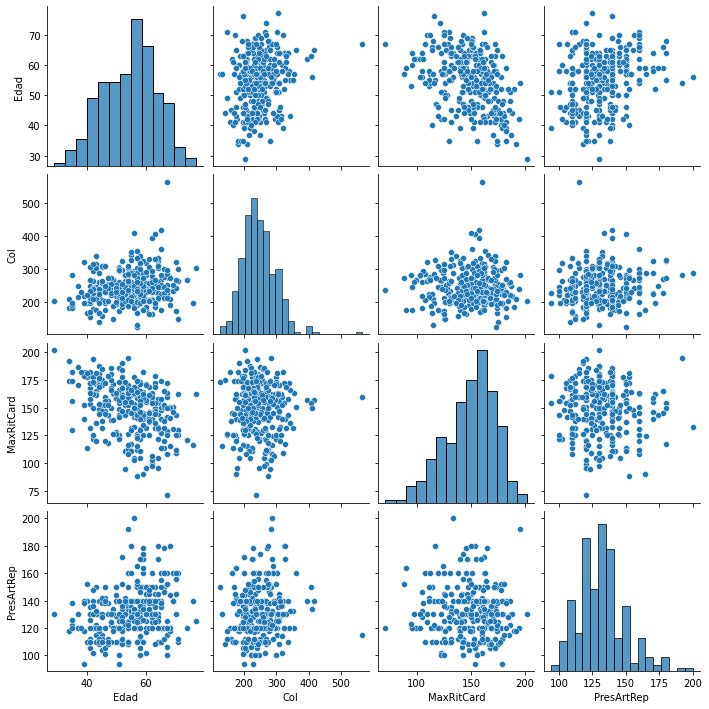

In [39]:
sns.pairplot(df[['Edad', 'Col', 'MaxRitCard', 'PresArtRep']])

Esta gráfica nos permite ver la relación por pares de distintas variables. Por ejemplo, es muy facil identificar que hay correlación negativa entre edad y máximo ritmo cardiaco.

### **Gráficas Multi Variantes**

**Scatterplot**

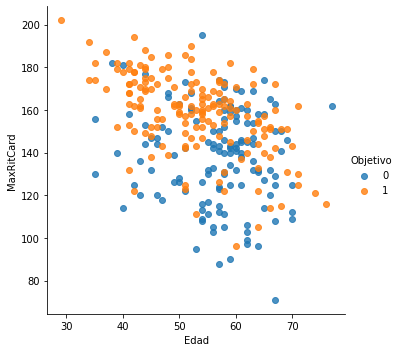

In [ ]:
sns.lmplot(x='Edad', y='MaxRitCard', hue='Objetivo', 
           data=df.loc[df['Objetivo'].isin([0,1])], 
           fit_reg=False)

Este tipo de scatterplot nos permite ver la dispersión para aquellos pacientes que fueron diagnosticados con enfermedad del corazón y los que no en la misma gráfica. Para los dos tipos de pacientes el máximo ritmo cardiaco disminuye con la edad. También podemos ver que los valores tienden a ser más altos para aquellos que sí fueron diagnosticados con una enfermedad del corazón.

**Histograma**

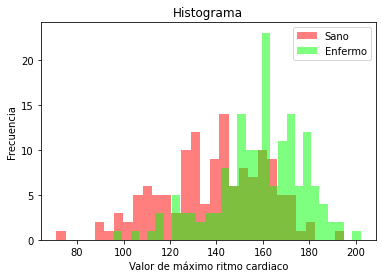

In [ ]:
m = plt.hist(df[df["Objetivo"] == 0].MaxRitCard,bins=30,fc = (1,0,0,0.5),label = "Sano")
b = plt.hist(df[df["Objetivo"] == 1].MaxRitCard,bins=30,fc = (0,1,0,0.5),label = "Enfermo")
plt.legend()
plt.xlabel("Valor de máximo ritmo cardiaco")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

Vemos que el histograma del máximo ritmo cardiaco para los pacientes sanos está más a la izquierda que el de los enfermos, es decir que muestran valores menores.

**Boxplots**

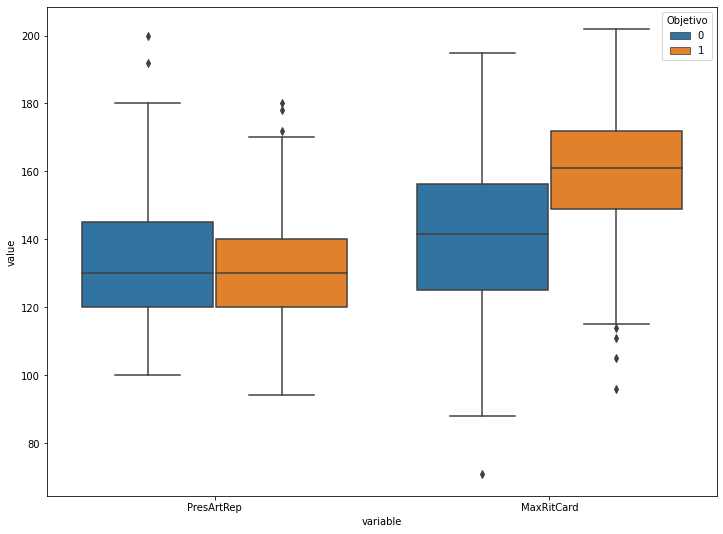

In [75]:
mdata = pd.melt(df,id_vars = "Objetivo",value_vars = ['PresArtRep', 'MaxRitCard'])
plt.figure(figsize = (12,9))
sns.boxplot(x = "variable", y = "value", hue="Objetivo",data= mdata)
plt.show()

Vemos que los pacientes que no fueron diagnosticados con una enfermedad del corazón tienden a mostrar mayor presión Arterial en Reposo pero un máximo ritmo cardiaco más bajo.

**Correlograma**

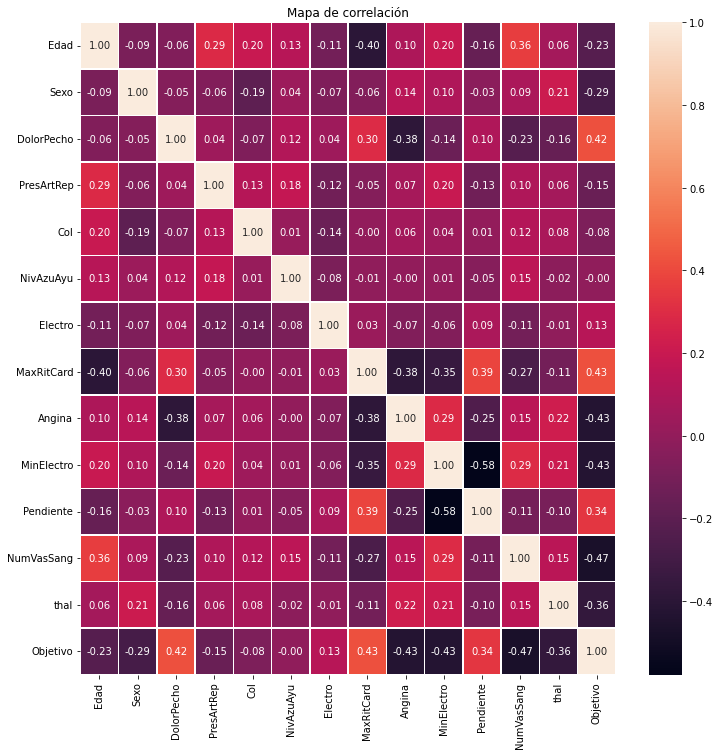

In [76]:
f,ax=plt.subplots(figsize = (12,12))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Esta gráfica nos da la misma información que la tabla de correlación que vimos en la sección de estadística, pero encontrar las correlaciones altas solo con verla. Vemos que las variables Angina, MinElectro, NumVasSang y thal tienen una buena correlación negativa con el Objetivo.

### **Gráficas Adicionales**

**Gráfica de Pastel**

Este tipo de gráficas puede ser muy útil al momento de comparar proporciones, se obtuvo el código de aquí: https://www.kaggle.com/chingchunyeh/heart-disease-report

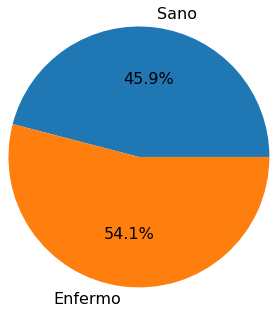

In [ ]:
df_target = df.groupby("Objetivo").size()
plt.pie(df_target.values, labels = ["Sano", "Enfermo"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

La gráfica de pastel nos permite visualizar la información en cuanto a proporciones, vemos que más del 50% de las personas en la base de datos fueron diagnosticadas con una enfermedad del corazón. 

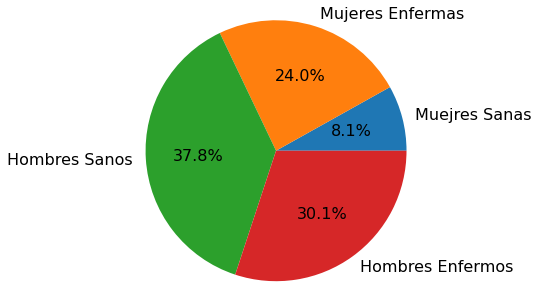

In [ ]:
df_sex = df.groupby(["Sexo","Objetivo"]).size()
plt.pie(df_sex.values, labels = ["Muejres Sanas", "Mujeres Enfermas", "Hombres Sanos", "Hombres Enfermos"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

Esta gráfica de pastel separa a los hombres y mujeres que fueron diagnosticados con enfermedad y los que no. Hay casi tres veces la cantidad de mujeres que fueron diagnosticadas con enfermedades del corazón en comparación a las que no. En el caso de los hombres, hay más sanos que enfermos.

# **BASE DE DATOS: Instagram Fake and Real Accounts**

https://www.kaggle.com/rezaunderfit/instagram-fake-and-real-accounts-dataset


### **Limpieza y Estadística**

In [45]:
import pandas as pd
import numpy as np
import json 
dfo = pd.read_csv("FakeAndRealAccounts.csv")
dfo = pd.read_csv("FakeAndRealAccounts.csv",encoding='utf8')
dfo.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


No se cambió el nombre de ninguna columna pues se consideran claros. Se considero que todas las columnas brindan información relevante para el problema. 

Después se escaneó la base de datos en busca de datos nulos y se descubrió que no existía ninguno.

In [46]:
 dfo.isnull().sum()

edge_followed_by        0
edge_follow             0
username_length         0
username_has_number     0
full_name_has_number    0
full_name_length        0
is_private              0
is_joined_recently      0
has_channel             0
is_business_account     0
has_guides              0
has_external_url        0
is_fake                 0
dtype: int64

### **Información Estadística Básica**

In [47]:
dfo['username_has_number'].sum()

506

Se obtuvo la suma de la columna de si el nombre de usuario tiene numeros para saber cuanto usuarios cumplen esta condición, utilizando 1 para marcar que el usuario sí tienen número y 0 para denotar lo contrario. En total 506 tienen por lo menos un número en su username.

In [48]:
dfo['username_length'].mean()

11.630573248407643

In [49]:
dfo['username_length'].describe()

count    785.000000
mean      11.630573
std        3.284329
min        5.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       26.000000
Name: username_length, dtype: float64

Se sacó la media de la longuitud del username, teniendo 11 caracteres en promedio. Observando un mínimo de 5 y un máximo de 26 caracteres en el username.

In [ ]:
dfo['is_fake'].cumsum()

0        1
1        2
2        3
3        4
4        5
      ... 
780    692
781    692
782    692
783    692
784    692
Name: is_fake, Length: 785, dtype: int64

En la columna 'is_fake' tenemos 1 si el la cuenta fue catalogada como falsa y 0 con la situación contraria, aprovechando esto, utilizando la función de suma acumulada obtenemos la cantidad de cuentas marcadas como falsas, con un total de 692 cuentas falsas.

In [50]:
dfo['is_fake'].count()

785

Como la suma de los datos no nulos es igual al total de registros, esta columna no cuenta con datos nulos.

In [77]:
dfo['full_name_length'].min()

0

In [78]:
dfo['full_name_length'].max()

30

Se obtuvo el minimo y maximo de la longuitud del nombre completo del usuario, se observa que hay cuentas con el apartado del nombre en blanco o sea 0 caracteres en el apartado y el la(s) cueta(s) con el mayor número de caracteres en este apartado tiene(n) 30.

In [69]:
dfo.corr()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
edge_followed_by,1.000000,-0.054259,-0.033704,-0.071313,-0.019349,0.116751,-0.024593,-0.044327,NaN,0.036585,0.002749,0.180392,-0.136808
edge_follow,-0.054259,1.000000,-0.112940,0.160248,0.104735,-0.089677,-0.072626,-0.133170,NaN,-0.132422,0.002723,-0.108482,0.272649
username_length,-0.033704,-0.112940,1.000000,-0.160610,-0.021410,0.277052,0.117582,-0.099414,NaN,0.132683,-0.006861,0.112466,-0.151752
username_has_number,-0.071313,0.160248,-0.160610,1.000000,0.217852,-0.246511,-0.154072,0.127046,NaN,-0.278637,-0.048097,-0.237466,0.370164
full_name_has_number,-0.019349,0.104735,-0.021410,0.217852,1.000000,0.250275,-0.072366,0.066941,NaN,-0.083482,-0.012527,-0.039926,0.128588
full_name_length,0.116751,-0.089677,0.277052,-0.246511,0.250275,1.000000,0.064409,-0.216572,NaN,0.323137,0.122848,0.309318,-0.350433
is_private,-0.024593,-0.072626,0.117582,-0.154072,-0.072366,0.064409,1.000000,-0.071448,NaN,-0.134444,-0.016999,-0.041399,-0.262292
is_joined_recently,-0.044327,-0.133170,-0.099414,0.127046,0.066941,-0.216572,-0.071448,1.000000,NaN,-0.172122,-0.026889,-0.150433,0.276012
has_channel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_business_account,0.036585,-0.132422,0.132683,-0.278637,-0.083482,0.323137,-0.134444,-0.172122,NaN,1.000000,0.126443,0.289467,-0.318395


In [72]:
dfo['has_channel'].sum()

0

¿Por qué los elementos de has_channel son NaNs?

En este caso esa columna está llena de ceros, lo que significa que ninguna cuenta ya sea real o fake cuenta con esa característica. La desviación estándar de esta columna es cero por lo que todos los valores de corr son el resultado de una división entre cero.

¿Sería prudente eliminar esta columna?

En este caso sí ya que esta columna no nos da información sobre las demás características o sobre la columna objetivo, no la eliminaremos porque queremos apreciar estos NaNs en el correlograma.

In [71]:
dfo.cov()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
edge_followed_by,0.001304,-0.000576,-0.003997,-0.001233,-0.000218,0.029271,-0.000345,-0.000770,0.0,0.000346,0.000004,0.001577,-0.001597
edge_follow,-0.000576,0.086345,-0.108996,0.022553,0.009618,-0.182979,-0.008287,-0.018815,0.0,-0.010185,0.000029,-0.007716,0.025907
username_length,-0.003997,-0.108996,10.786819,-0.252640,-0.021976,6.318471,0.149958,-0.156993,0.0,0.114065,-0.000804,0.089416,-0.161169
username_has_number,-0.001233,0.022553,-0.252640,0.229387,0.032609,-0.819831,-0.028654,0.029257,0.0,-0.034931,-0.000822,-0.027532,0.057330
full_name_has_number,-0.000218,0.009618,-0.021976,0.032609,0.097676,0.543145,-0.008782,0.010059,0.0,-0.006829,-0.000140,-0.003021,0.012996
full_name_length,0.029271,-0.182979,6.318471,-0.819831,0.543145,48.217789,0.173672,-0.723089,0.0,0.587326,0.030447,0.519940,-0.786883
is_private,-0.000345,-0.008287,0.149958,-0.028654,-0.008782,0.173672,0.150786,-0.013340,0.0,-0.013665,-0.000236,-0.003892,-0.032936
is_joined_recently,-0.000770,-0.018815,-0.156993,0.029257,0.010059,-0.723089,-0.013340,0.231191,0.0,-0.021663,-0.000461,-0.017509,0.042916
has_channel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
is_business_account,0.000346,-0.010185,0.114065,-0.034931,-0.006829,0.587326,-0.013665,-0.021663,0.0,0.068514,0.001181,0.018341,-0.026950


Observamos muchos valores muy cercanos a cero, esto es porque la mayoría de las variables indican con 0 y 1 si la cuenta cumple con cierta condición.

## **Gráfica datos Univariantes**

**Gráfica de barras**

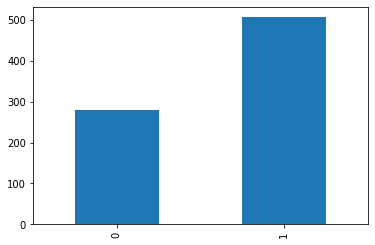

In [ ]:
dfo['username_has_number'].value_counts().sort_index().plot.bar()

En esta grafica vemos los datos de si el nombre de usuario contiene números representados con un 0 si esta afirmación es incorrecta y un 1 si es correcta, podemos concluir que la mayoría de las cuentas tiene números en su username.

**Gráfica de líneas**

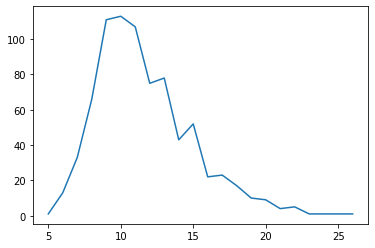

In [ ]:
dfo['username_length'].value_counts().sort_index().plot.line()

Aquí vemos graficados los datos de la longitud del nombre de usuario y el pico está en los 10 caracteres por lo que es la longitud más frecuente.

**Histograma**

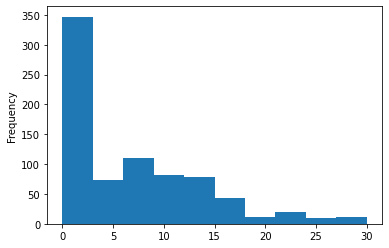

In [ ]:
dfo['full_name_length'].plot.hist()

Se puede observar que la primera columna es la que tiene mayor número de cuentas porque lo que podemos concluir que la mayoria no tienen un nombre completo registrado.

## **Gráficas Bi-Variantes**

**Gráficos de dispersión**

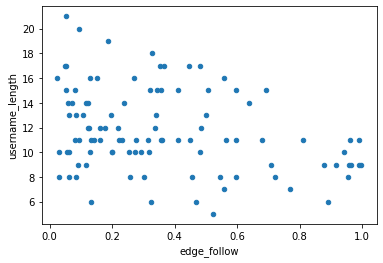

In [ ]:
dfo.sample(100).plot.scatter(x='edge_follow', y='username_length')

No podemos ver una tendencia clara pues los datos estan muy dispersos, podríamos decir que la mayoría de datos se concentran en el cuadrante inferior izquierdo pero no es muy representativo. Además parece que los datos se correlacionan de forma negativa.

**Hexaplot**

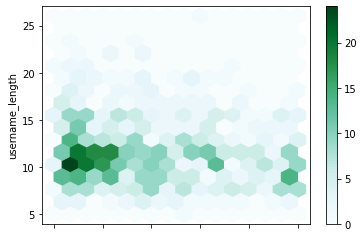

In [ ]:
dfo.plot.hexbin(x='edge_follow', y='username_length', gridsize=15)

En esta grafica vemos mas claramente la concentración de datos en el cuadrante inferior izquierdo por lo que podemos decir que la mayoría de cuentas tiene un nombre de usuario corto y las siguen a pocas cuentas.

## **Stacked Plots**



**Gráfica de barras apilada**

In [73]:
y=dfo.loc[dfo['is_fake']==1,'username_length'].value_counts()
p=dfo.loc[dfo['is_fake']==0,'username_length'].value_counts()
n=range(5,26)
bda = pd.DataFrame({"Longitud de nombre usuario":n, "Cuenta Falsa":y, "Cuenta Real":p})
bda= bda.set_index("Longitud de nombre usuario")
bda = bda.fillna(0)
bda.head()

,Cuenta Falsa,Cuenta Real
Longitud de nombre usuario,,
5,1.0,0.0
6,11.0,2.0
7,33.0,0.0
8,63.0,3.0
9,99.0,12.0


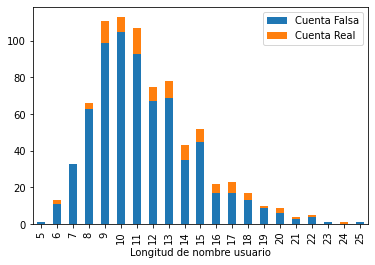

In [ ]:
bda.plot.bar(stacked=True)

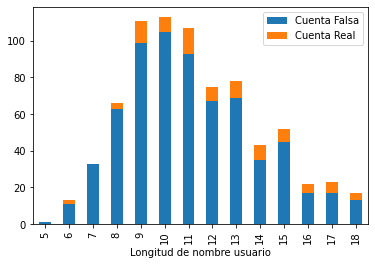

In [ ]:
bda.head(14).plot.bar(stacked=True)

Se hizo una segunda grafica con solo los primeros 14 datos porque consideramos que los últimos no son relevantes pero en la segunda grafica podemos ver que que las longuitudes mas frecuentes estan entre los 9 y 11 caracteres, sin embargo hay un numero representativo de cuentas con nombres de usuario entre 7 y 15 caracteres.

**Gráfica de Área Apilada**

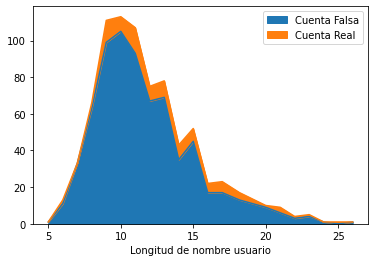

In [ ]:
bda.plot.area()

En esta grafica podemos ver que esta base de datos esta conformada principalmente por cuentas falsas pues contamos con más datos de estas y vemos que el pico esta en los 10 caracteres para ambos tipos de cuenta.

**Gráfica de lineas**

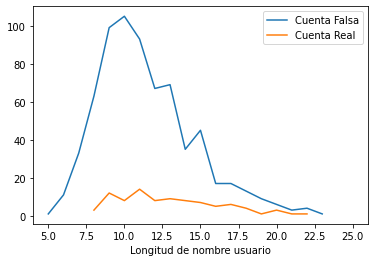

In [ ]:
bda.plot.line()

Esta grafica es similar a la anterior podemos confirmar que esta base de datos está conformada principalmente por cuentas falsas pues contamos con más datos de estas y vemos que el pico esta en los 10 caracteres para las cuentas falsas pero en las cuentas reales no es muy claro.

## **Otras librerías**

**Gráfico de barras**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


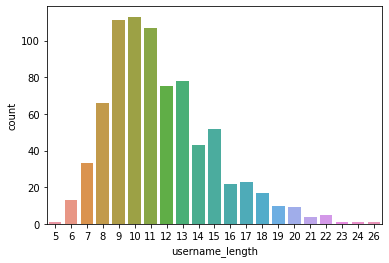

In [ ]:
sns.countplot(dfo['username_length'])

Este grafico nos confirma que la mayoría de cuentas tienen entre 7 y 15 caracteres en su username estando la longitud de 10 caracteres con la más popular, que es lo que nos habían mostrado los gráficos anteriores que hemos hecho con el dato de la longitud del username.

**Kernel Density Estimation**

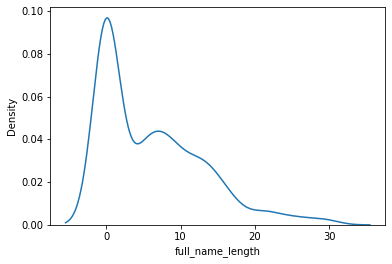

In [ ]:
sns.kdeplot(dfo.full_name_length)

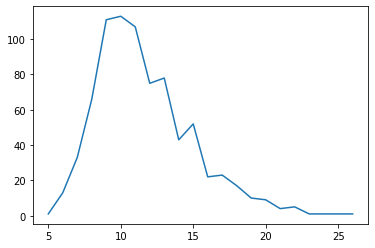

In [ ]:
dfo['username_length'].value_counts().sort_index().plot.line()

Vemos que, comprado al gráfico de líneas, el KDE tiene una apariencia más suavizada y nos brinda una idea de como se distribuye la frecuencia de username_length.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


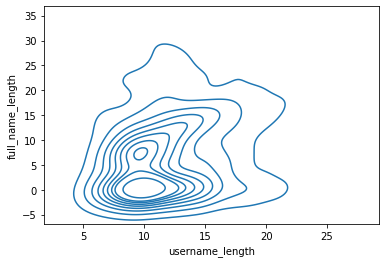

In [ ]:
sns.kdeplot(dfo['username_length'],dfo['full_name_length'])

El KDE tiene la propiedad que entre más dimensiones se grafican, empeora la estimación de densidad, en este caso pareciera que full_name_length puede tomar valores menores a cero pero sabemos que no es posible. Esto es a causa de la alta frecuecnia con la que aparacen cuentas con 0 caracteres en el campo de nombre completo.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


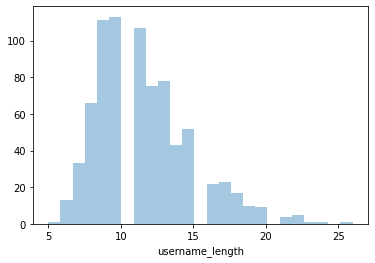

In [ ]:
sns.distplot(dfo['full_name_length'],  kde=False)

En este histograma hay espacios en blanco porque hay más intervalos que valores que puede tomar la variable, si quisieramos usar un histograma sería mejor usar el de la librería de matplotlib.

**Jointplot**

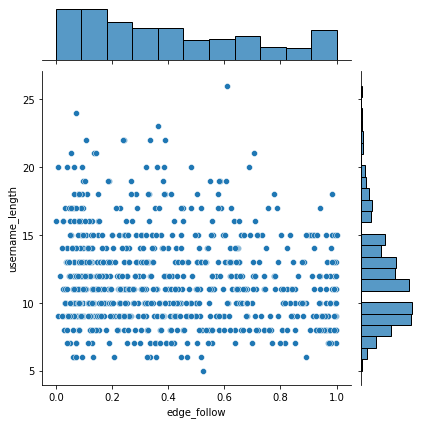

In [ ]:
sns.jointplot(x='edge_follow', y='username_length',data=dfo)

Vemos que las variables tienen una relación negativa, además por el histograma de edge_follow vemos que la mayoría son menores 0.2, mientras que para username_lenth la mayoría son entre 8 y 12.

**Joint Hexplot**

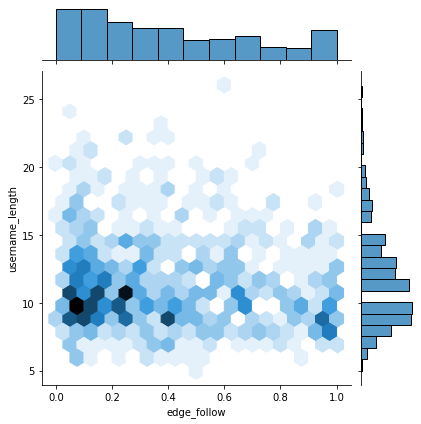

In [ ]:
sns.jointplot(x='edge_follow', y='username_length', data=dfo, kind='hex', gridsize=20)

Aqui se aprecia mejor las áreas donde hay mayor concetración de datos, en este caso cuando username_lenght es menor a 15 y edge_follow es menor a 0.3.

**Boxplot**

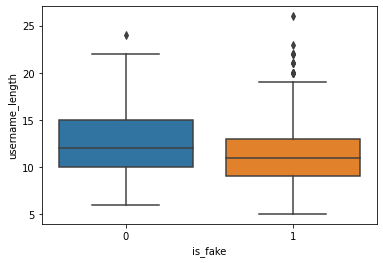

In [ ]:
sns.boxplot(x='is_fake',y='username_length',data=dfo)

Vemos que las cuentas reales muestran valores mayores a las falsas en cuanto a longitud del username, pero las falsas tienden a presentar valores muy alejados de los demás, que son los datos atípicos.

**Gráfica de Violín**

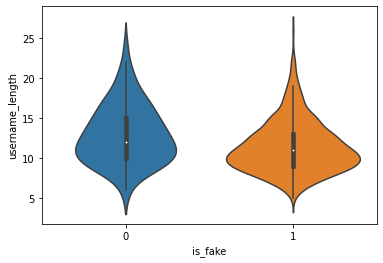

In [ ]:
sns.violinplot(x='is_fake',y='username_length',data=dfo)

Para cuentas falsas como reales la mayoría cuenta con una longitud de username entre 9 y 13 caracteres, y la cola delgada en la gráfica de las cuentas falsas son los datos atípicos que se apreciaban anteriormente.

**Matriz de Relaciones**

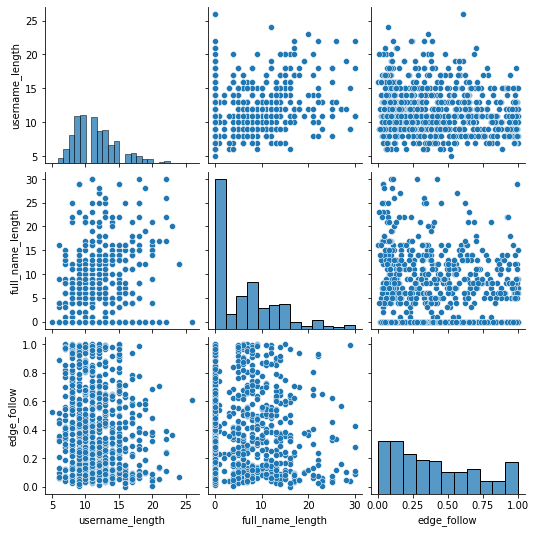

In [ ]:
sns.pairplot(dfo[['username_length', 'full_name_length', 'edge_follow']])

Podemos utilizar esta matriz de gráficas para ver la relación entre pares de muchas variables. Hay una correlación positiva entre username_length y full_name_length pero negativa entre full_name_length y edge_follow.

## **Gráficas Multivariantes**

**Scatterplot**

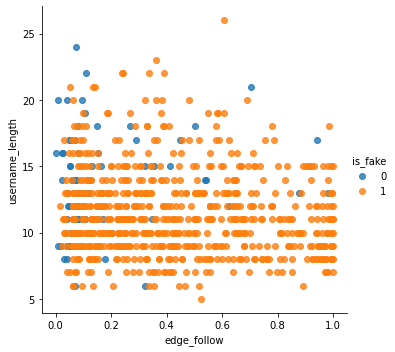

In [61]:
sns.lmplot(y='username_length', x='edge_follow', hue='is_fake', 
           data=dfo.loc[dfo['is_fake'].isin([0,1])], 
           fit_reg=False)

Hay muchas cuentas flasas y caemos en el problema del overplotting. Se puede ver que hay una correlación negativa entre las variables ya sea una cuenta real o una falsa, pero no es muy claro.

**Histograma**

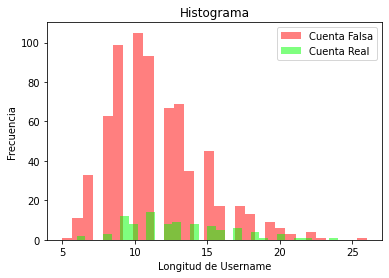

In [64]:
m1 = plt.hist(dfo[dfo["is_fake"] == 1].username_length,bins=30,fc = (1,0,0,0.5),label = "Cuenta Falsa")
b1 = plt.hist(dfo[dfo["is_fake"] == 0].username_length,bins=30,fc = (0,1,0,0.5),label = "Cuenta Real")
plt.legend()
plt.xlabel("Longitud de Username")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

Se observa la distribución de las frecuencias de la longitud de los usernames, a través de las distintas gráficas hemos visto como hay muchos más registros para cuentas falsas. Para ambos casos su máximo es alrededor de 10.

**Boxplot**

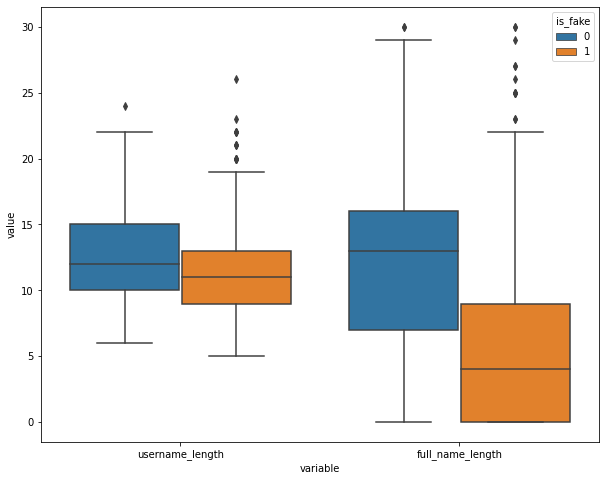

In [79]:
mdata1 = pd.melt(dfo,id_vars = "is_fake",value_vars = ['username_length', 'full_name_length'])
plt.figure(figsize = (10,8))
sns.boxplot(x = "variable", y = "value", hue="is_fake",data= mdata1)
plt.show()

De aquí podemos ver que las cuentas falsas tienen menor número de caracteres tanto en su username como en el nombre completo asciado a la cuenta. También vemos que para las cuentas falsas es más común presentar datos muy por encima a las otras observaciones (atípicos o outliers). Además se observa que para las cuentas fake, el mínimo de full_name_length coincide con el primer cuartil, es decir que el 25% de cuentas falsas tiene en blanco el campo de nombre.

**Correlograma**

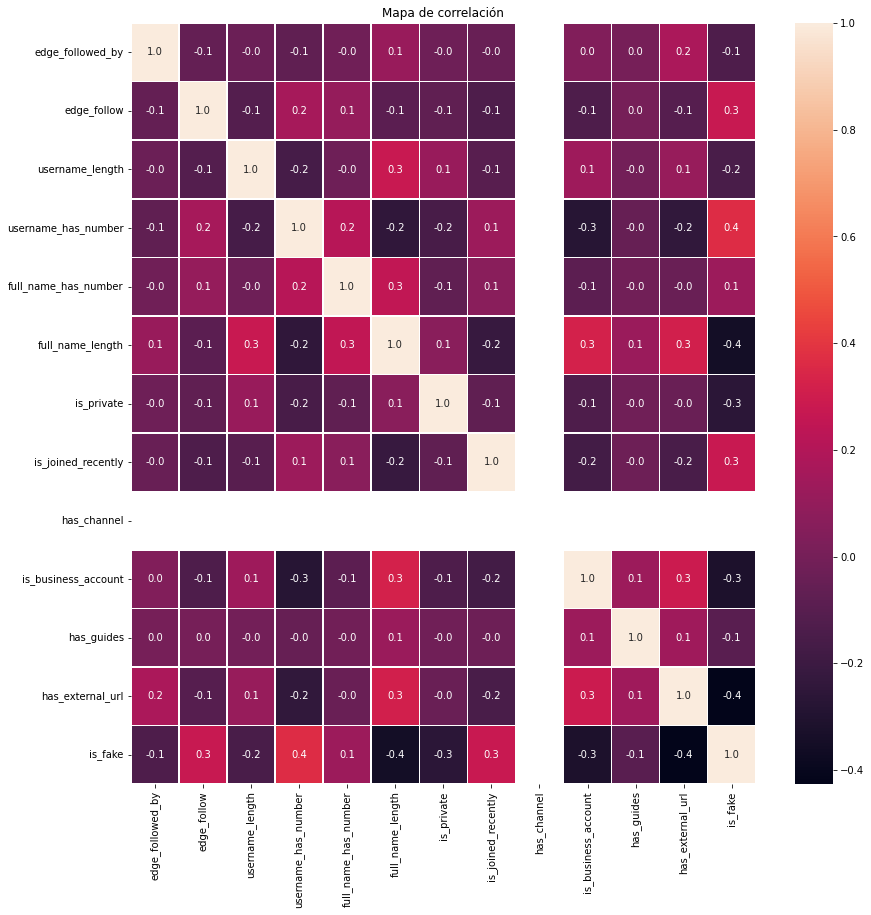

In [68]:
f,ax=plt.subplots(figsize = (14,14))
sns.heatmap(dfo.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Esta es la misma información que nos brinda la función corr() en estadística pero es más visual, los NaNs en esta gráfica se ven con espacios en blancos. Vemos que las variables que más se correlacionan con el objetivo (is_fake) son edge_follow, username_has_number, is_joined_recently de manera positiva y full_name_length, is_private, has_external_url y is_business_account de manera negativa.